

```Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
# This is formatted as code
```

bold text

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.options.display.max_columns=None
import warnings
warnings.filterwarnings('ignore')


In [3]:
test=pd.read_csv('/content/drive/MyDrive/test.csv')
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
train=pd.read_csv('/content/drive/MyDrive/train.csv')
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train.shape,test.shape

((103904, 25), (25976, 25))

In [7]:
### combining train data and test data
combined=pd.concat([train,test],axis=0,ignore_index=True)
combined.shape

(129880, 25)

**checking duplicates**


In [8]:
combined[combined.index.duplicated()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [10]:
combined.isnull().sum()/len(combined)*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [11]:
### making object columns list
cat_col=combined.select_dtypes(include='object').columns
cat_col

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [12]:
### making object columns list
num_col=combined.select_dtypes(include=np.number).columns
num_col

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [13]:
## checking the irrelevent columns
combined.std()

Unnamed: 0                           31207.377062
id                                   37493.270818
Age                                     15.119360
Flight Distance                        997.452477
Inflight wifi service                    1.329340
Departure/Arrival time convenient        1.526741
Ease of Online booking                   1.401740
Gate location                            1.278520
Food and drink                           1.329933
Online boarding                          1.350719
Seat comfort                             1.319289
Inflight entertainment                   1.334049
On-board service                         1.287099
Leg room service                         1.316252
Baggage handling                         1.180025
Checkin service                          1.266185
Inflight service                         1.176669
Cleanliness                              1.313682
Departure Delay in Minutes              38.071126
Arrival Delay in Minutes                38.465650


In [14]:
## droping unnamed and id
df=combined.copy()
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [15]:
df.shape

(129880, 23)

In [16]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [17]:
## univariate analysis
cat_col

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

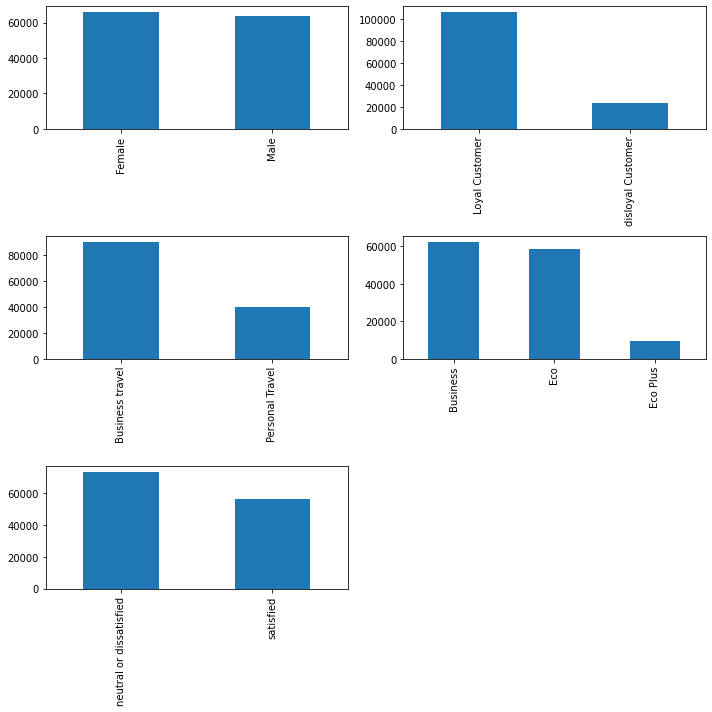

In [ ]:
a=3
b=2
c=1
plt.figure(figsize=[10,10])
for i in cat_col:
  plt.subplot(a,b,c)
  df[i].value_counts().plot(kind='bar')
  c=c+1
plt.tight_layout()
plt.show()

* male and female ratio are same
* loyal customer are more than disloayal customer
* buisness travel are more than personal travel
* buisness and eco are more than ecoplus
* we may combined eco class with eco plus class
* satisfied people is quite less than dissatisfied

In [18]:
num_col

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

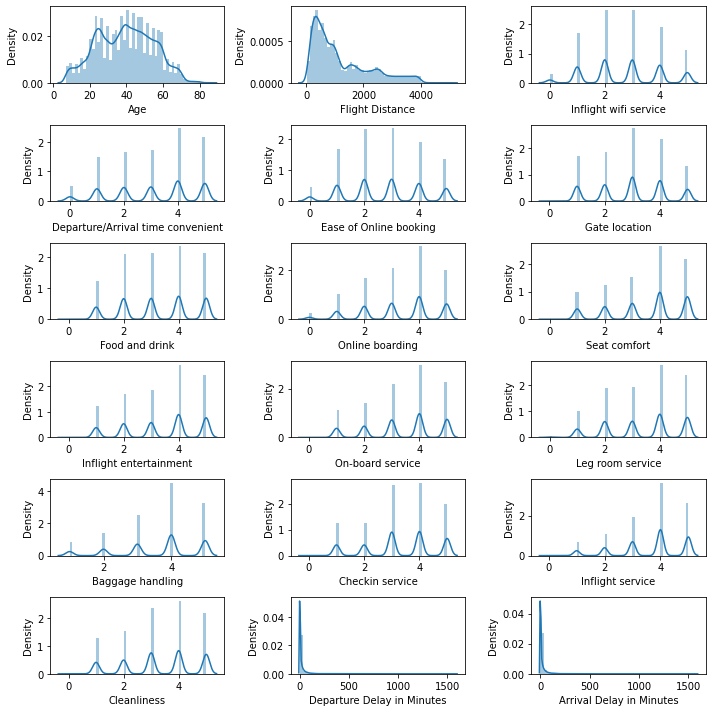

In [19]:
a=6
b=3
c=1
plt.figure(figsize=[10,10])
for i in [ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']:
  plt.subplot(a,b,c)
  sns.distplot(df[i])
  c=c+1
plt.tight_layout()
plt.show()

* age is almost symmetric
* and rest of the continuous variables are positive skewed

In [20]:
df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']].skew()

Age                          -0.003606
Flight Distance               1.108142
Departure Delay in Minutes    6.821980
Arrival Delay in Minutes      6.670125
dtype: float64

* This proved the above statement

**Lets do bivaraite analysis**
* for categories

In [21]:
len(df.columns)

23

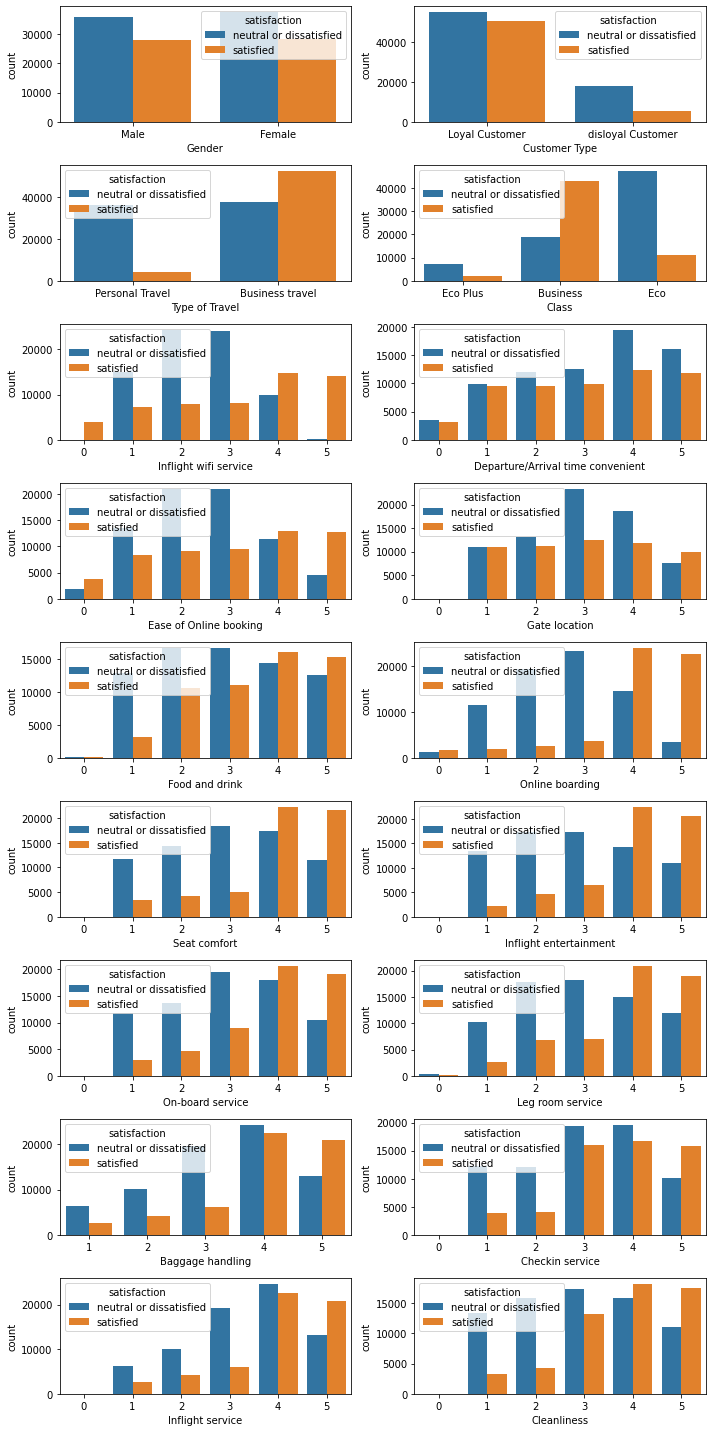

In [26]:
a=9
b=2
c=1
plt.figure(figsize=[10,20])
for i in df.drop(['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction'],axis=1).columns:
  
  plt.subplot(a,b,c)
  # pd.crosstab(df[i],df['satisfaction']).plot(kind='bar')
  sns.countplot(df[i],hue=df['satisfaction'])
  c=c+1
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

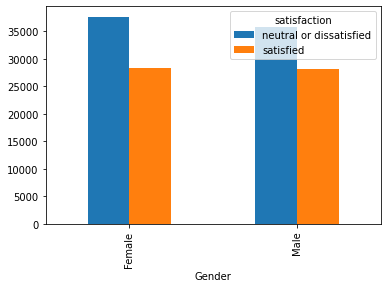

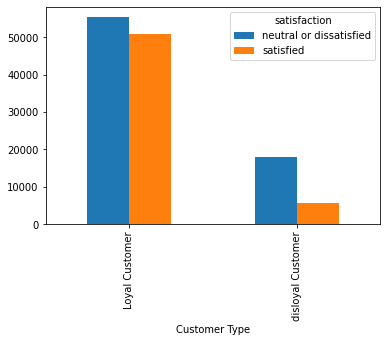

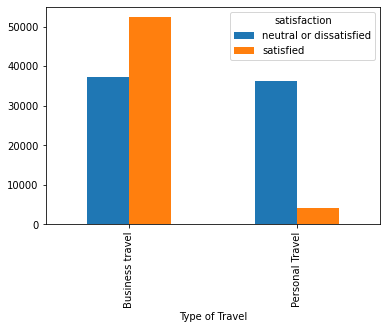

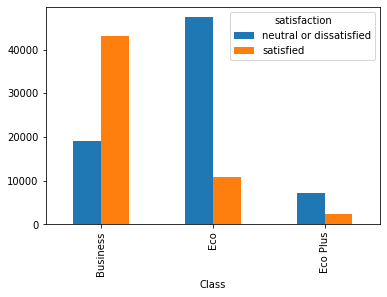

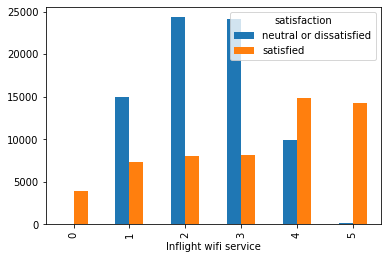

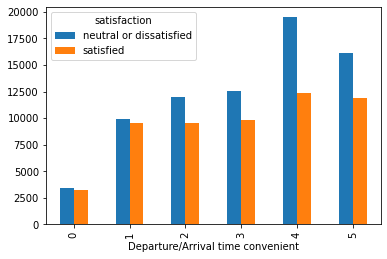

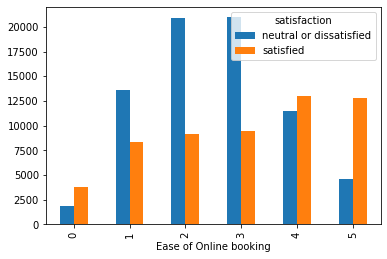

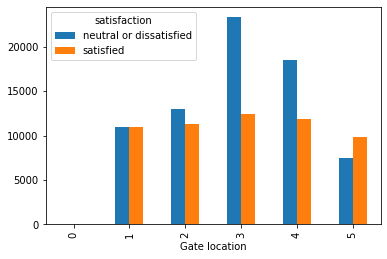

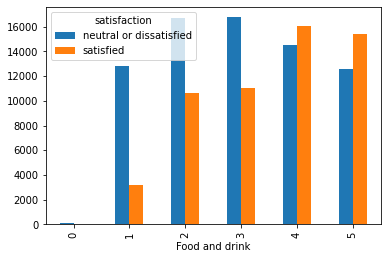

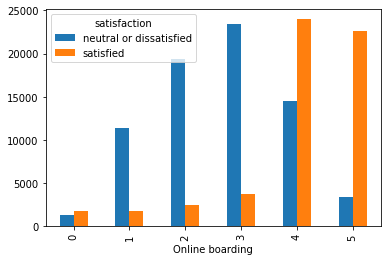

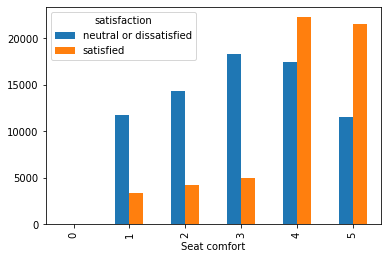

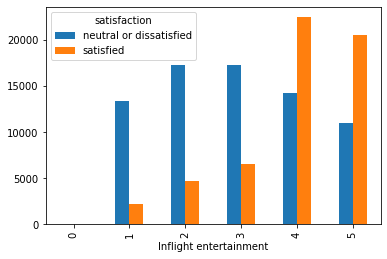

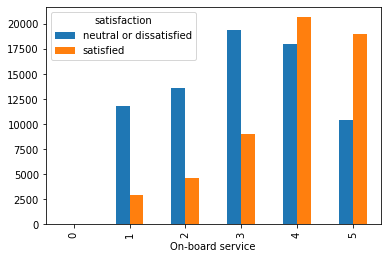

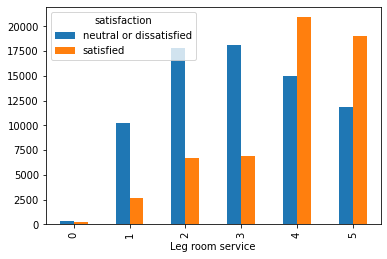

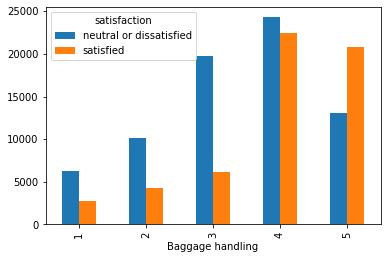

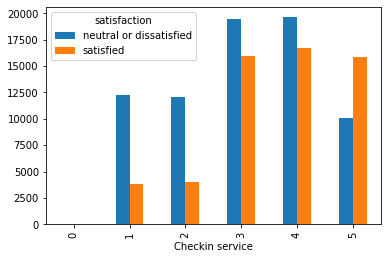

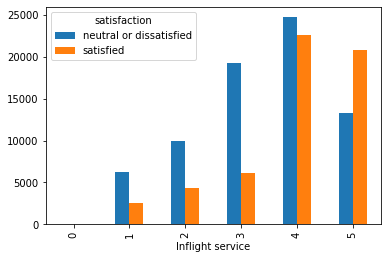

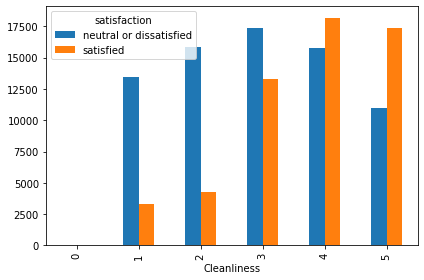

In [22]:
a=6
b=3
c=1
plt.figure(figsize=[10,10])
for i in df.drop(['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction'],axis=1).columns:
  
  # plt.subplot(a,b,c)
  pd.crosstab(df[i],df['satisfaction']).plot(kind='bar')
  c=c+1
plt.tight_layout()
plt.show()

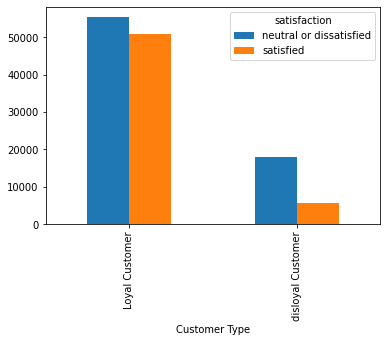

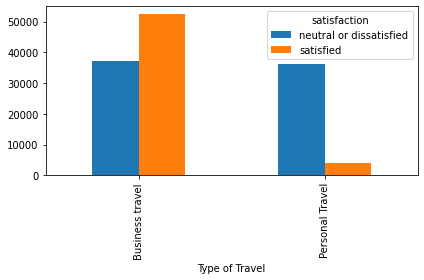

In [ ]:
a=2
b=1
c=1
# plt.figure(figsize=[10,10])
for i in df[['Customer Type','Type of Travel']].columns:
  
  # plt.subplot(a,b,c)
  pd.crosstab(df[i],df['satisfaction']).plot(kind='bar')
  c=c+1
plt.tight_layout()
plt.show()

In [ ]:
len(df.drop(['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction'],axis=1).columns)

18

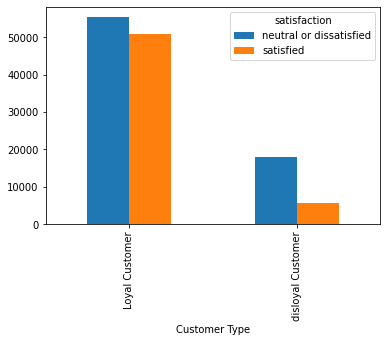

In [ ]:
pd.crosstab(df['Customer Type'],df['satisfaction']).plot(kind='bar')

**statistical anylsis**

In [27]:
for i in df.drop(['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction'],axis=1).columns:
  ct=pd.crosstab(df[i],df['satisfaction'])
  tstats,pv,dof,exp_f=stats.chi2_contingency(ct)
  print(f"p value for {i} is {pv} ")



p value for Gender is 5.259838493340003e-05 
p value for Customer Type is 0.0 
p value for Type of Travel is 0.0 
p value for Class is 0.0 
p value for Inflight wifi service is 0.0 
p value for Departure/Arrival time convenient is 9.767302052551637e-128 
p value for Ease of Online booking is 0.0 
p value for Gate location is 0.0 
p value for Food and drink is 0.0 
p value for Online boarding is 0.0 
p value for Seat comfort is 0.0 
p value for Inflight entertainment is 0.0 
p value for On-board service is 0.0 
p value for Leg room service is 0.0 
p value for Baggage handling is 0.0 
p value for Checkin service is 0.0 
p value for Inflight service is 0.0 
p value for Cleanliness is 0.0 


** all the categorical columns are important **

*lets check for continuous variable*

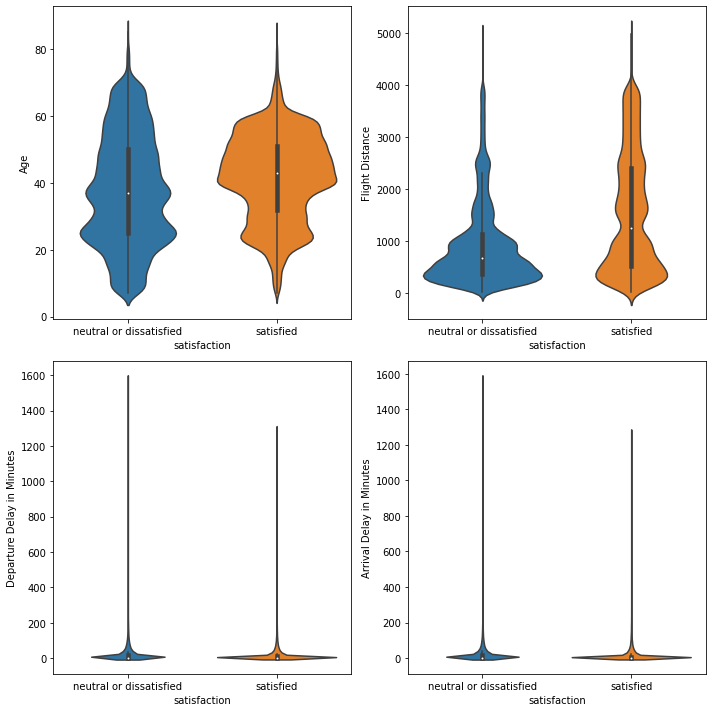

In [28]:
a=2
b=2
c=1
plt.figure(figsize=[10,10])
for i in df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']].columns:
  plt.subplot(a,b,c)
  sns.violinplot(df['satisfaction'],df[i])
  c=c+1
plt.tight_layout()
plt.show()

In [29]:
for i in df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']].columns:
  
  print(f"for {i}",df.groupby('satisfaction').describe()[i],sep="\n\n")

for Age

                           count       mean        std  min   25%   50%   75%  \
satisfaction                                                                    
neutral or dissatisfied  73452.0  37.650997  16.465802  7.0  25.0  37.0  50.0   
satisfied                56428.0  41.741015  12.797669  7.0  32.0  43.0  51.0   

                          max  
satisfaction                   
neutral or dissatisfied  85.0  
satisfied                85.0  
for Flight Distance

                           count         mean          std   min    25%  \
satisfaction                                                              
neutral or dissatisfied  73452.0   929.715420   791.293326  31.0  372.0   
satisfied                56428.0  1529.539165  1127.596799  31.0  525.0   

                            50%     75%     max  
satisfaction                                     
neutral or dissatisfied   674.0  1149.0  4983.0  
satisfied                1249.0  2407.0  4983.0  
for Departure De

** lets do some statistical anylsis **

In [30]:
for i in df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']].columns:
  a=df[df['satisfaction']=='neutral or dissatisfied'][i]
  b=df[df['satisfaction']=='satisfied'][i]
  tststs,pv=stats.ttest_ind(a,b)
  print(f"for{i} the pvalue is {pv}")



forAge the pvalue is 0.0
forFlight Distance the pvalue is 0.0
forDeparture Delay in Minutes the pvalue is 8.634339209724878e-75
forArrival Delay in Minutes the pvalue is nan


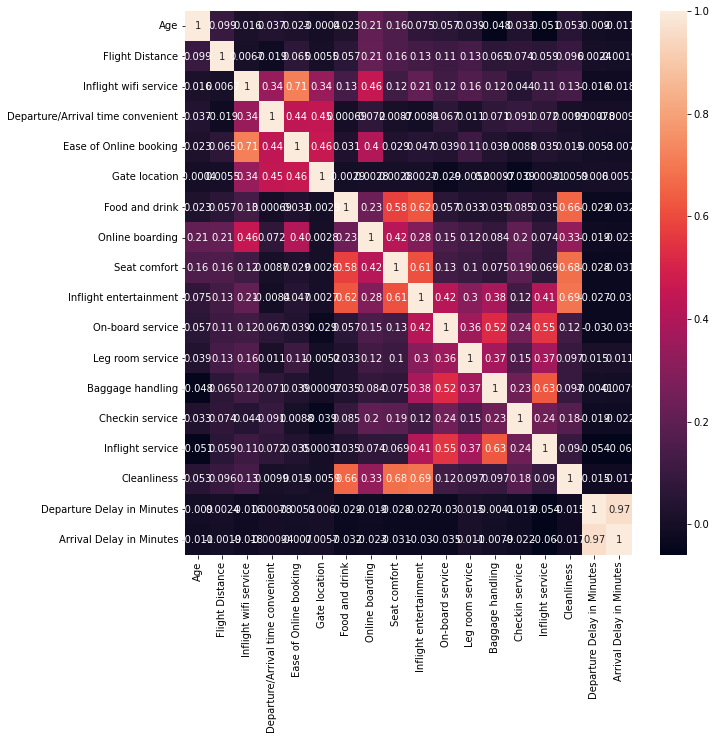

In [31]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)

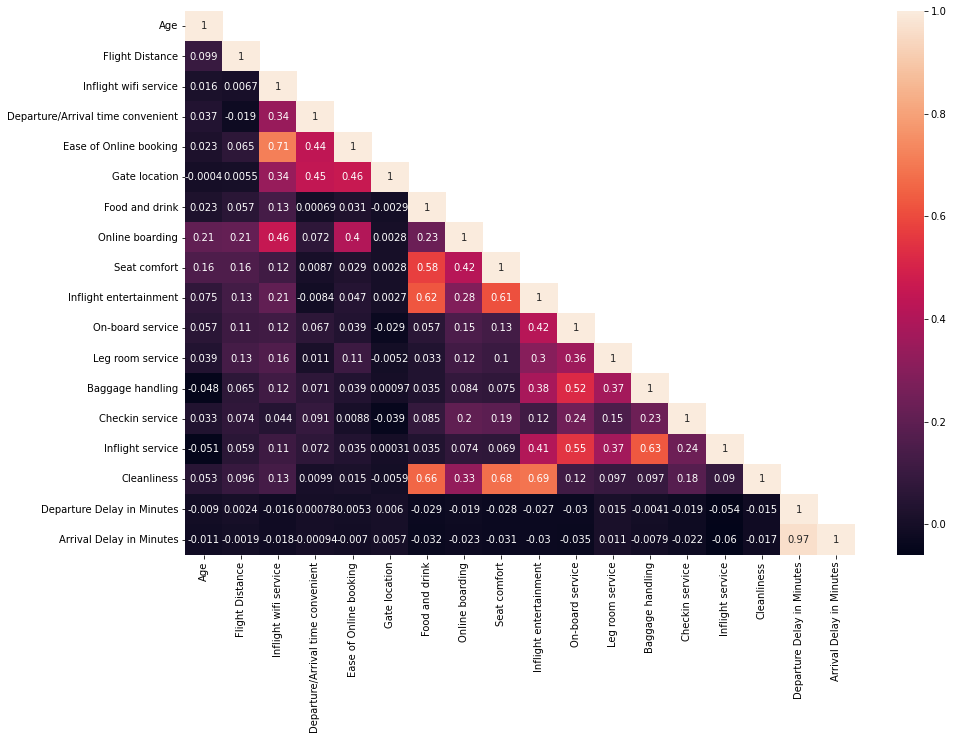

In [45]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr(),k=1))

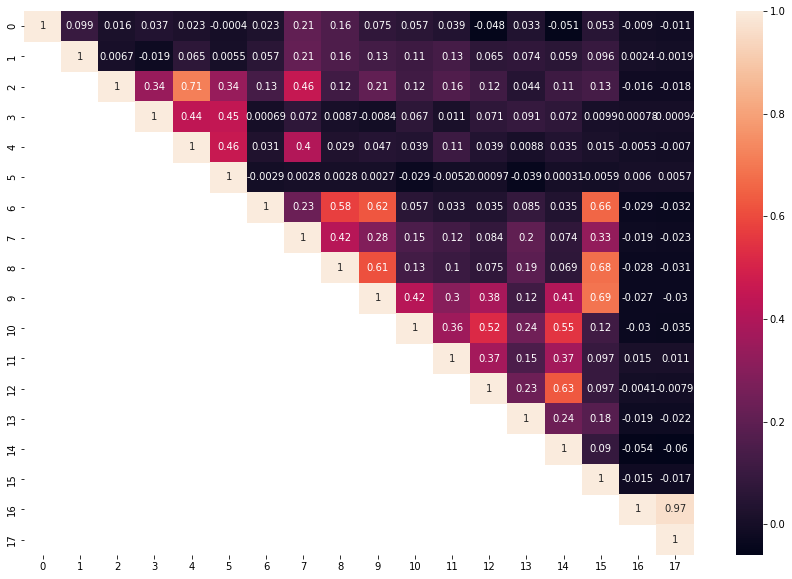

In [33]:
plt.figure(figsize=[15,10])
corr_mat=df.corr()
corr_mat=np.triu(corr_mat,k=-1)
mask=np.triu(np.zeros_like(corr_mat,dtype=bool))
mask[np.tril_indices_from(mask,k=-1)]=True
sns.heatmap(corr_mat,annot=True,mask=mask)

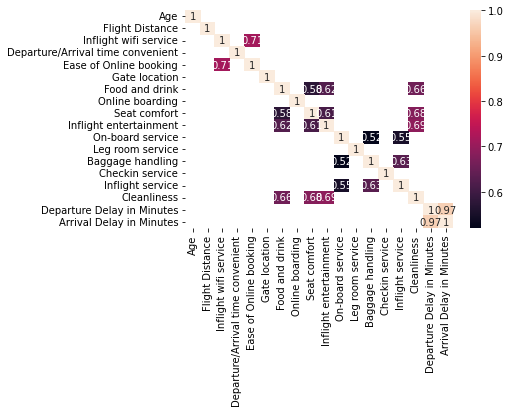

In [32]:
sns.heatmap(df.corr()[abs(df.corr())>0.5],annot=True)

* all the continuous variables are important,but need to treat nan value for arrival variable

In [ ]:
df[['Arrival Delay in Minutes','Departure Delay in Minutes']]

,Arrival Delay in Minutes,Departure Delay in Minutes
0,18.0,25
1,6.0,1
2,0.0,0
3,9.0,11
4,0.0,0
...,...,...
129875,0.0,0
129876,0.0,0
129877,0.0,0
129878,0.0,0


**null value treatment**

In [ ]:
df.groupby('satisfaction').describe()['Arrival Delay in Minutes']

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,73225.0,17.055992,40.522021,0.0,0.0,0.0,16.0,1584.0
satisfied,56262.0,12.533859,35.449502,0.0,0.0,0.0,8.0,1280.0


* we can replace the null value with 0

In [ ]:
df['Arrival Delay in Minutes'].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [ ]:
condf=df[['Departure Delay in Minutes','Arrival Delay in Minutes','Age','Flight Distance']]

In [ ]:
recol=df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes','Age','Flight Distance'],axis=1).columns

In [ ]:
recol

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [ ]:
# c=1
# for i in range(0,len(condf.columns)):
#   for j in range(0,len(condf.columns)):
#     for k in recol:
#       plt.figure(figsize=[10,20])
#       if i<j:
#         plt.subplot(114,1,c)
#         sns.scatterplot(df.iloc[:,i],df.iloc[:,j],hue=df[k])
#         c=c+1
# plt.tight_layout()
# plt.grid()

    
      


In [ ]:
condf.head()

,Departure Delay in Minutes,Arrival Delay in Minutes,Age,Flight Distance
0,25,18.0,13,460
1,1,6.0,25,235
2,0,0.0,26,1142
3,11,9.0,25,562
4,0,0.0,61,214


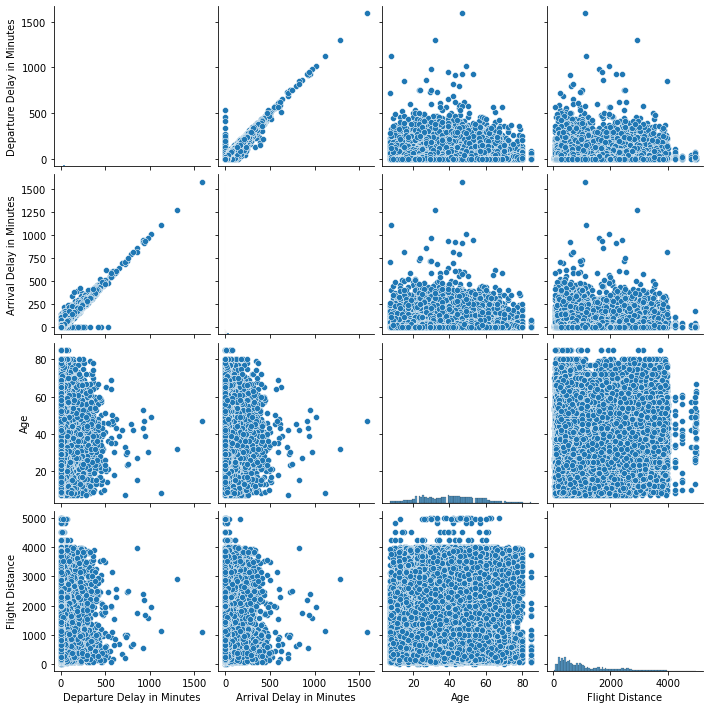

In [ ]:

sns.pairplot(df[['Departure Delay in Minutes','Arrival Delay in Minutes','Age','Flight Distance']])

In [ ]:
len(a)

73452

**outliers treatment**

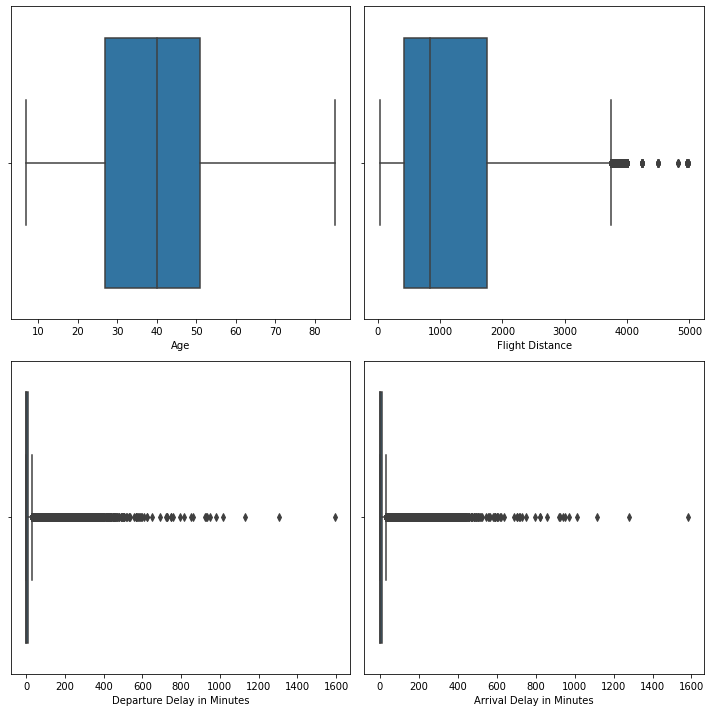

In [ ]:
a=2
b=2
c=1
plt.figure(figsize=[10,10])
for i in df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']].columns:
  plt.subplot(a,b,c)
  sns.boxplot(df[i])
  c=c+1
plt.tight_layout()
plt.show()

In [ ]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
up=q3+(iqr*1.5)
l=q1-(iqr*1.5)
outl=df[~((df<l)|(df>up)).any(axis=1)]
outl.shape

(93648, 23)

In [ ]:
outl.skew()

Age                                 -0.021546
Flight Distance                      1.021293
Inflight wifi service                0.012331
Departure/Arrival time convenient   -0.384380
Ease of Online booking              -0.032011
Gate location                       -0.037193
Food and drink                      -0.178216
Online boarding                     -0.537862
Seat comfort                        -0.557964
Inflight entertainment              -0.416397
On-board service                    -0.511325
Leg room service                    -0.381410
Baggage handling                    -0.769164
Checkin service                     -0.106156
Inflight service                    -0.803158
Cleanliness                         -0.352791
Departure Delay in Minutes           2.140119
Arrival Delay in Minutes             2.143161
dtype: float64

In [ ]:
outl.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


In [ ]:
outl['rank_class']=outl['Class'].map({'Eco Plus':2,'Eco':1,'Business':3})

In [ ]:
outl.drop('Class',axis=1,inplace=True)

In [ ]:
outl=pd.get_dummies(outl,drop_first=True)

In [ ]:
df1=df.copy()

In [ ]:
df1.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [ ]:
df1['rank_class']=df1['Class'].map({'Eco Plus':2,'Eco':1,'Business':3})

In [ ]:
df1.drop('Class',axis=1,inplace=True)

In [ ]:
df1=pd.get_dummies(df1,drop_first=True)

In [ ]:
df1.shape

(129880, 23)

**scaling the data**

In [ ]:
outl.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,rank_class,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,2,1,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,3,0,0,0,1
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,3,1,0,0,1
5,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,1,0,0,1,0
6,47,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,1,1,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scaled=mms.fit_transform(outl)
scaled_df=pd.DataFrame(scaled,columns=outl.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scaled1=mms.fit_transform(df1)
scaled_df1=pd.DataFrame(scaled1,columns=df1.columns)

In [ ]:
scaled_df1.shape,scaled_df.shape

((129880, 23), (93648, 23))

In [ ]:
scaled_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,rank_class,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
0,0.076923,0.115696,0.6,0.8,0.6,0.2,1.0,0.6,1.00,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.5,1.0,0.0,1.0,0.0
1,0.243590,0.299622,0.4,0.4,0.4,0.4,1.0,1.0,1.00,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0,0.0,0.0,0.0,1.0
2,0.692308,0.049353,0.6,0.6,0.6,0.6,0.8,1.0,1.00,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0,1.0,0.0,0.0,1.0
3,0.243590,0.309871,0.6,0.8,0.4,0.2,0.2,0.4,0.00,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0,0.0,0.0,1.0,0.0
4,0.512821,0.335761,0.4,0.8,0.4,0.6,0.4,0.4,0.25,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0,1.0,0.0,1.0,0.0


In [ ]:
scaled_df.skew()

Age                                 -0.021546
Flight Distance                      1.021293
Inflight wifi service                0.012331
Departure/Arrival time convenient   -0.384380
Ease of Online booking              -0.032011
Gate location                       -0.037193
Food and drink                      -0.178216
Online boarding                     -0.537862
Seat comfort                        -0.557964
Inflight entertainment              -0.416397
On-board service                    -0.511325
Leg room service                    -0.381410
Baggage handling                    -0.769164
Checkin service                     -0.106156
Inflight service                    -0.803158
Cleanliness                         -0.352791
Departure Delay in Minutes           2.140119
Arrival Delay in Minutes             2.143161
rank_class                          -0.109014
Gender_Male                          0.031057
Customer Type_disloyal Customer      1.633378
Type of Travel_Personal Travel    

**spliting the data into train and test**

In [ ]:
newtrain=scaled_df1.loc[0:train.shape[0]-1,:]
newtest=scaled_df1.loc[train.shape[0]:,:]

In [ ]:
train.shape[0],scaled_df1.shape

(103904, (129880, 23))

In [ ]:
combined.shape

(129880, 25)

In [ ]:
train.shape,test.shape

((103904, 25), (25976, 25))

In [ ]:
newtrain.shape,newtest.shape

((103904, 23), (25976, 23))

In [ ]:
xtrain=newtrain.loc[:,newtrain.columns!='satisfaction_satisfied']
ytrain=newtrain['satisfaction_satisfied']
xtest=newtest.loc[:,newtrain.columns!='satisfaction_satisfied']
ytest=newtest['satisfaction_satisfied']

In [ ]:
import statsmodels.api as sm

In [ ]:
cxtrain=sm.add_constant(xtrain)
cxtest=sm.add_constant(xtest)

**making model**

In [ ]:
m1=sm.Logit(ytrain,cxtrain).fit()
m1.summary()

Optimization terminated successfully.
         Current function value: 0.334666
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     satisfaction_satisfied   No. Observations:               103904
Model:                              Logit   Df Residuals:                   103881
Method:                               MLE   Df Model:                           22
Date:                    Sun, 12 Jun 2022   Pseudo R-squ.:                  0.5109
Time:                            12:56:08   Log-Likelihood:                -34773.
converged:                           True   LL-Null:                       -71094.
Covariance Type:                nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -6.5935      0.069    -95.750      0.000      -6.728      -6.459
Age                                  -0.6321      0.055    -11.438      0.000      -0.740      -0.524
Flight Distance                       0.0199      0.055      0.361      0.718      -0.088       0.128
Inflight wifi service                 1.9256      0.057     33.713      0.000       1.814       2.038
Departure/Arrival time convenient    -0.6306      0.041    -15.372      0.000      -0.711      -0.550
Ease of Online booking               -0.6946      0.057    -12.271      0.000      -0.806      -0.584
Gate location                         0.1482      0.046      3.238      0.001       0.059       0.238
Food and drink                       -0.1329      0.053     -2.497      0.013      -0.237      -0.029
Online boarding                       3.0907      0.051     60.556      0.000       2.991       3.191
Seat comfort                          0.3535      0.056      6.346      0.000       0.244       0.463
Inflight entertainment                0.2980      0.071      4.189      0.000       0.159       0.437
On-board service                      1.5328      0.051     30.156      0.000       1.433       1.632
Leg room service                      1.2736      0.043     29.918      0.000       1.190       1.357
Baggage handling                      0.5484      0.046     12.004      0.000       0.459       0.638
Checkin service                       1.6323      0.043     38.207      0.000       1.549       1.716
Inflight service                      0.6108      0.060     10.157      0.000       0.493       0.729
Cleanliness                           1.1076      0.060     18.354      0.000       0.989       1.226
Departure Delay in Minutes            6.6457      1.459      4.556      0.000       3.787       9.505
Arrival Delay in Minutes            -14.0639      1.437     -9.789      0.000     -16.880     -11.248
rank_class                            0.7133      0.026     27.908      0.000       0.663       0.763
Gender_Male                           0.0449      0.019      2.310      0.021       0.007       0.083
Customer Type_disloyal Customer      -2.0003      0.030    -67.463      0.000      -2.058      -1.942
Type of Travel_Personal Travel       -2.7415      0.031    -87.648      0.000      -2.803      -2.680
=====================================================================================================
"""

In [ ]:
trainpred=[1 if i>0.5 else 0 for i in m1.fittedvalues]
testpred=[1 if i>0.5 else 0 for i in m1.predict(cxtest)]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90     58879
         1.0       0.92      0.78      0.84     45025

    accuracy                           0.87    103904
   macro avg       0.88      0.86      0.87    103904
weighted avg       0.88      0.87      0.87    103904



In [ ]:
print(classification_report(ytest,testpred))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     14573
         1.0       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



* this the base model
* it's not overfitted

**lets try decision tree model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
m2=dt.fit(xtrain,ytrain)
trainpred=m2.predict(xtrain)
testpred=m2.predict(xtest)

In [ ]:
print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58879
         1.0       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [ ]:
print(classification_report(ytest,testpred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     14573
         1.0       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



* lets tuned the parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt=DecisionTreeClassifier()
tp={'criterion':['gini','entropy'],'max_depth':[4,5,6,7],'min_samples_split':[2,3,4,5],'min_samples_leaf':[2,3,4]}
gsc=GridSearchCV(dt,param_grid=tp)
gscm=gsc.fit(xtrain,ytrain)


In [ ]:
gscm.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

* taking this parameter and making model

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=4,min_samples_split=2)
m3=dt.fit(xtrain,ytrain)
trainpred=m3.predict(xtrain)
testpred=m3.predict(xtest)

In [ ]:
print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     58879
         1.0       0.95      0.89      0.92     45025

    accuracy                           0.93    103904
   macro avg       0.94      0.93      0.93    103904
weighted avg       0.93      0.93      0.93    103904



In [ ]:
print(classification_report(ytest,testpred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     14573
         1.0       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



**result is satisfied**

**now lets try clustering**

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from scipy.cluster.hierarchy import cophenet,dendrogram


In [ ]:
from scipy.spatial.distance import pdist

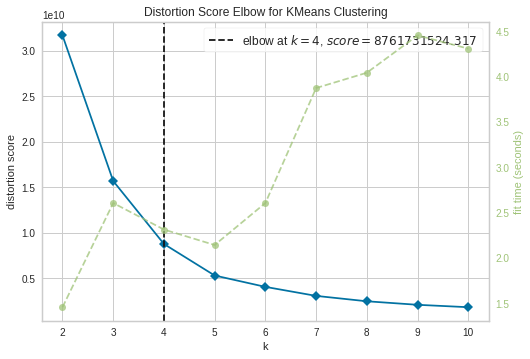

In [ ]:
k=KMeans(random_state=100)
kk=KElbowVisualizer(k)
clus=kk.fit(df1)
clus.show()


In [ ]:
sc=[]
for i in range(2,11):
  k=KMeans(n_clusters=i,random_state=100)
  lab=k.fit_predict(df1)
  sc.append(silhouette_score(df1,lab))
  print(f"for {i} the sc is  {silhouette_score(df1,lab)}")

for 2 the sc is  0.6896162381532297
for 3 the sc is  0.6173282832615151
for 4 the sc is  0.5779403218637221
for 5 the sc is  0.5780906718217754
for 6 the sc is  0.5399450658150153
for 7 the sc is  0.5325659590035876
for 8 the sc is  0.5275881412423531
for 9 the sc is  0.4952820177597651
for 10 the sc is  0.4862001834748638


In [ ]:
K=KMeans(n_clusters=3,random_state=100)
lab=k.fit_predict(df1)
df1['klab']=lab

In [ ]:
df1.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,rank_class,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,klab
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,2,1,0,1,0,8
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,3,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,3,0,0,0,1,2
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,3,0,0,0,0,5
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,3,1,0,0,1,0


In [ ]:
sns.scatterplot(df1['Age'],df1['Flight Distance'],hue=df1['klab'])

In [ ]:
df1.klab.unique()